In this example, we will introduce how to use `pybdshadow` to generate, analyze and visualize the building shadow data

# Building data preprocessing

Building data can be obtain by Python package [OSMnx](https://osmnx.readthedocs.io/en/stable/) from OpenStreetMap (Some of the buildings do not contain the height information).

The buildings are usually store in the data as the form of Polygon object with `height` column. Here, we provide a demo building data store as GeoJSON file to demonstrate the functionality of `pybdshadow`

In [1]:
import pandas as pd
import geopandas as gpd
import pybdshadow
#Read building data
buildings = gpd.read_file(r'../example/data/bd_demo_2.json')
buildings.head(5)

,Id,Floor,height,x,y,geometry
0,0,2,6.0,120.597313,31.309152,"POLYGON ((120.59739 31.30921, 120.59740 31.309..."
1,0,2,6.0,120.597276,31.309312,"POLYGON ((120.59737 31.30938, 120.59738 31.309..."
2,0,2,6.0,120.597313,31.308982,"POLYGON ((120.59741 31.30905, 120.59742 31.308..."
3,0,2,6.0,120.597272,31.309489,"POLYGON ((120.59735 31.30955, 120.59736 31.309..."
4,0,2,6.0,120.597128,31.309778,"POLYGON ((120.59729 31.30986, 120.59730 31.309..."


The input building data must be a `GeoDataFrame` with the `height` column storing the building height information and the `geometry` column storing the geometry polygon information of building outline.

<AxesSubplot:>

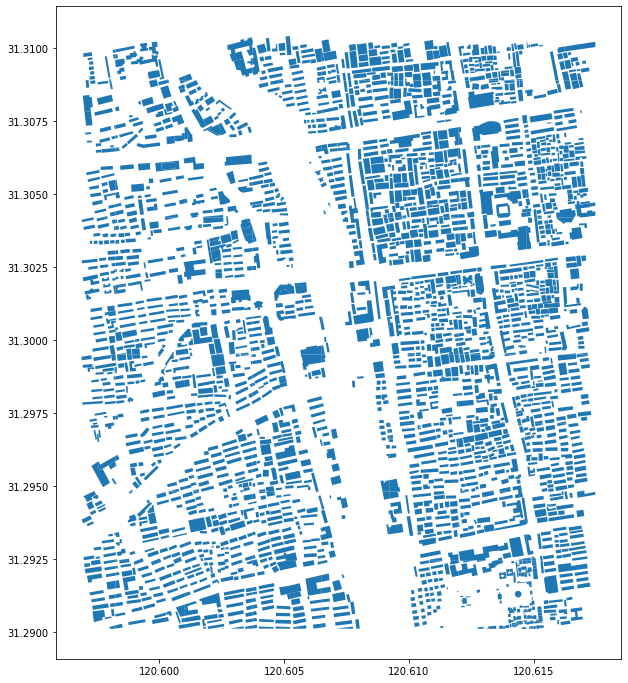

In [2]:
#Plot the buildings
buildings.plot(figsize=(12,12))

Before analysing buildings, make sure to preprocess building data using `pybdshadow.bd_preprocess` before calculate shadow. It will remove empty polygons, convert multipolygons into polygons and generate `building_id` for each building.

In [3]:
buildings = pybdshadow.bd_preprocess(buildings)
buildings.head(5)

,geometry,Id,Floor,height,x,y,building_id
0,"POLYGON ((120.60496 31.29717, 120.60521 31.297...",0,2,6.0,120.604951,31.297207,0
1,"POLYGON ((120.60494 31.29728, 120.60496 31.297...",0,2,6.0,120.604951,31.297207,1
0,"POLYGON ((120.59739 31.30921, 120.59740 31.309...",0,2,6.0,120.597313,31.309152,2
1,"POLYGON ((120.59737 31.30938, 120.59738 31.309...",0,2,6.0,120.597276,31.309312,3
2,"POLYGON ((120.59741 31.30905, 120.59742 31.308...",0,2,6.0,120.597313,31.308982,4


# Generate building shadows

## Shadow generated by Sun light

Given a building GeoDataFrame and UTC datetime, `pybdshadow` can calculate the building shadow based on the sun position obtained by `suncalc`

In [4]:
#Given UTC time
date = pd.to_datetime('2022-01-01 12:45:33.959797119')\
    .tz_localize('Asia/Shanghai')\
    .tz_convert('UTC')
#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,roof=True,include_building = False)
shadows

,height,building_id,geometry,type
0,6.0,186,"POLYGON ((120.60080 31.30858, 120.60080 31.308...",roof
1,6.0,524,POLYGON EMPTY,roof
2,6.0,1009,"POLYGON ((120.60394 31.30111, 120.60394 31.301...",roof
3,6.0,2229,"MULTIPOLYGON (((120.61384 31.29957, 120.61384 ...",roof
4,6.0,2297,"POLYGON ((120.61328 31.29770, 120.61330 31.297...",roof
...,...,...,...,...
3072,0.0,3072,"POLYGON ((120.61484 31.29058, 120.61484 31.290...",ground
3073,0.0,3073,"POLYGON ((120.61532 31.29039, 120.61532 31.290...",ground
3074,0.0,3074,"MULTIPOLYGON (((120.61499 31.29096, 120.61499 ...",ground
3075,0.0,3075,"POLYGON ((120.61472 31.29091, 120.61472 31.290...",ground


The generated shadow data is store as another `GeoDataFrame`. It contains both rooftop shadow(with height over 0) and ground shadow(with height equal to 0).

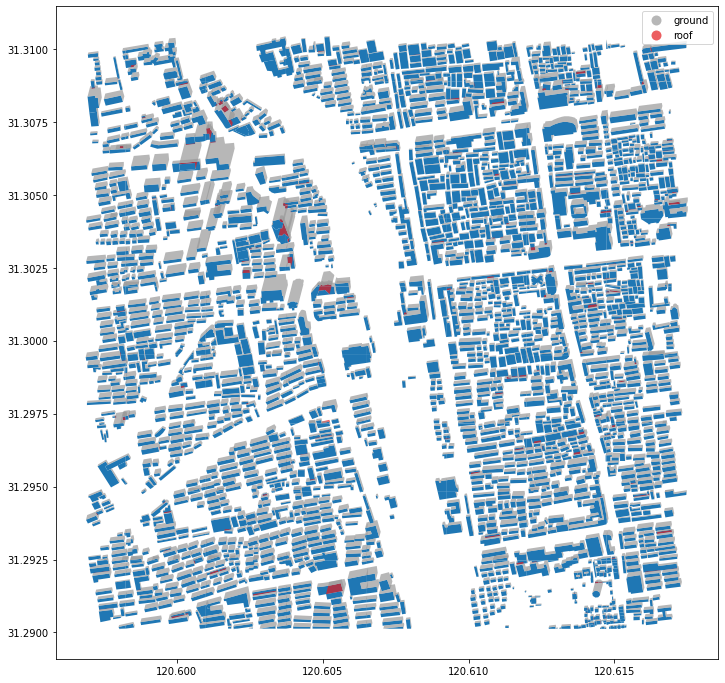

In [5]:
# Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1, (12, 12))
ax = plt.subplot(111)

# plot buildings
buildings.plot(ax=ax)

# plot shadows
shadows.plot(ax=ax, alpha=0.7,
             column='type',
             categorical=True,
             cmap='Set1_r',
             legend=True)

plt.show()


`pybdshadow` also provide 3D visualization method supported by keplergl.

In [6]:
#Visualize using keplergl
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o3', 'type': '…

![1649161376291.png](https://github.com/ni1o1/pybdshadow/raw/main/image/README/1649161376291_1.png)

## Shadow generated by Point light

`pybdshadow` can generate the building shadow generated by point light, which can be potentially useful for visual area analysis in urban environment. Given coordinates and height of the point light:

In [7]:
#Define the position and the height of the point light
pointlon,pointlat,pointheight = [120.60820619503946,31.300141884245672,100]
#Calculate building shadow for point light
shadows = pybdshadow.bdshadow_pointlight(buildings,pointlon,pointlat,pointheight)
#Visualize buildings and shadows
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o3', 'type': '…

![1649405838683.png](https://github.com/ni1o1/pybdshadow/raw/main/image/README/1649405838683_1.png)

# Shadow coverage analysis

To demonstrate the analysis function of `pybdshadow`, here we select a smaller area for detail analysis of shadow coverage.

<AxesSubplot:>

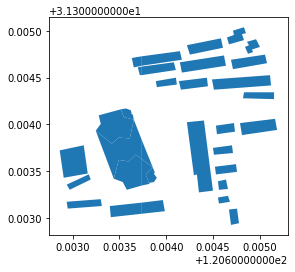

In [6]:
#define analysis area
bounds = [120.603,31.303,120.605,31.305]
#filter the buildings
buildings['x'] = buildings.centroid.x
buildings['y'] = buildings.centroid.y
buildings_analysis = buildings[(buildings['x'] > bounds[0]) &
                      (buildings['x'] <  bounds[2]) &
                      (buildings['y'] >  bounds[1]) &
                      (buildings['y'] <  bounds[3])]
buildings_analysis.plot()

Use `pybdshadow.cal_sunshine` to analyse shadow coverage and sunshine time. Here, we select `2022-01-01` as the date, set the spatial resolution of 1 meter*1 meter grids, and 900 s as the time interval.

In [7]:
#calculate sunshine time on the building roof
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-01-01',
                                   roof=True,
                                   accuracy=1, #Set the accuracy  as number, it will generate grids as anlysis unit
                                   precision=900)

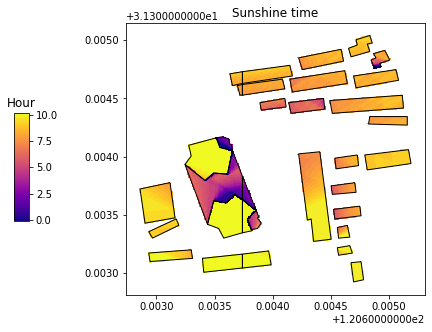

In [8]:
#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))
plt.sca(ax)
plt.title('Sunshine time')
plt.show()

In [9]:
#calculate sunshine time on the ground (set the roof to False)
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-01-01',
                                   roof=False,
                                   accuracy=1,
                                   precision=900)

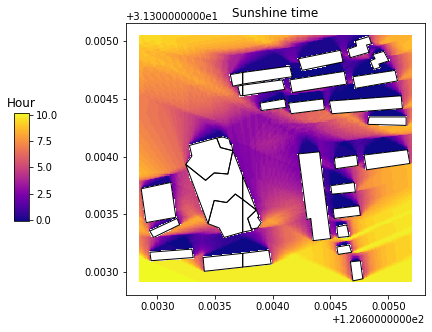

In [10]:
#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))
plt.sca(ax)
plt.title('Sunshine time')
plt.show()

We can change the date to see if it has different result:

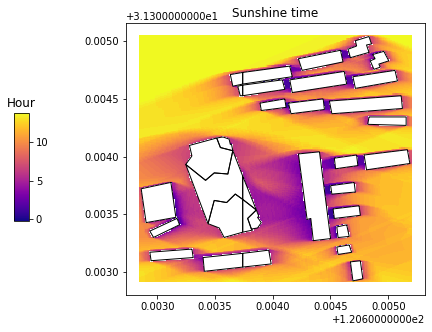

In [11]:
#calculate sunshine time on the ground (set the roof to False)
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-07-15',
                                   roof=False,
                                   accuracy=1,
                                   precision=900)
#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='k',facecolor=(0,0,0,0))
plt.sca(ax)
plt.title('Sunshine time')
plt.show()

Set the accuracy  as `vector`, it will calculate the vector polygon in sunshine analysis

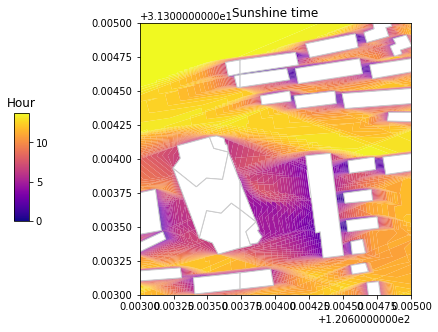

In [16]:
sunshine = pybdshadow.cal_sunshine(buildings_analysis,
                                   day='2022-07-15',
                                   roof=False,
                                   accuracy='vector',
                                   precision=900)

#Visualize buildings and sunshine time using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,5))
ax = plt.subplot(111)
#define colorbar
cax = plt.axes([0.15, 0.33, 0.02, 0.3])
plt.title('Hour')
#plot the sunshine time
sunshine.plot(ax = ax,cmap = 'plasma',column ='Hour',alpha = 1,legend = True,cax = cax,)
#Buildings
buildings_analysis.plot(ax = ax,edgecolor='#ccc',facecolor=(1,1,1,1))
plt.sca(ax)
plt.title('Sunshine time')
plt.xlim(bounds[0],bounds[2])
plt.ylim(bounds[1],bounds[3])
plt.show()